In [1]:
import pandas as pd 
import numpy as np
import os
import shutil
import PIL
import PIL.Image
import tensorflow as tf
data_directory = "datasets"

In [161]:
train_ds = tf.keras.utils.image_dataset_from_directory(
"All_Data\Training",
labels='inferred',
seed=123,
shuffle=True,
image_size=(48,48),
label_mode='int',
#color_mode="grayscale",
)

val_ds = tf.keras.utils.image_dataset_from_directory(
"All_Data\Validation",
labels='inferred',
seed=123,
shuffle=True,
image_size=(48,48),
label_mode='int',
#color_mode="grayscale",
)

test_ds = tf.keras.utils.image_dataset_from_directory(
"All_Data\Test",
labels='inferred',
seed=123,
shuffle=True,
image_size=(48,48),
label_mode='int',
#color_mode="grayscale",
)

class_names = test_ds.class_names


Found 28221 files belonging to 7 classes.
Found 3777 files belonging to 7 classes.
Found 3519 files belonging to 7 classes.


In [162]:
print(class_names)

['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Surprised']


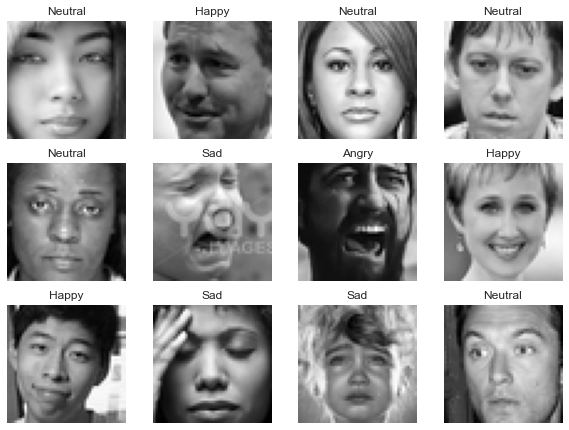

In [190]:
import matplotlib.pyplot as plt

#sample = test_ds.take(1)
sample = train_ds.take(1)


plt.figure(figsize=(10, 10))
for images, labels in sample:
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [157]:
print("TRAIN | Number of 32-batches:", train_ds.cardinality().numpy())
print("VAL | Number of 32-batches:", val_ds.cardinality().numpy())
print("TEST | Number of 32-batches:", test_ds.cardinality().numpy())

TRAIN | Number of 32-batches: 882
VAL | Number of 32-batches: 119
TEST | Number of 32-batches: 110


In [ ]:
"""def dataset_fn(ds):
  return ds.filter(lambda x,y: tf.reduce_all(tf.not_equal(y, [2])))
dataset = test_ds.apply(dataset_fn)
sample = dataset.take(-1)
for images,labels in sample:
  print(labels)
"""

Text(0.5, 1.0, 'Test Subset')

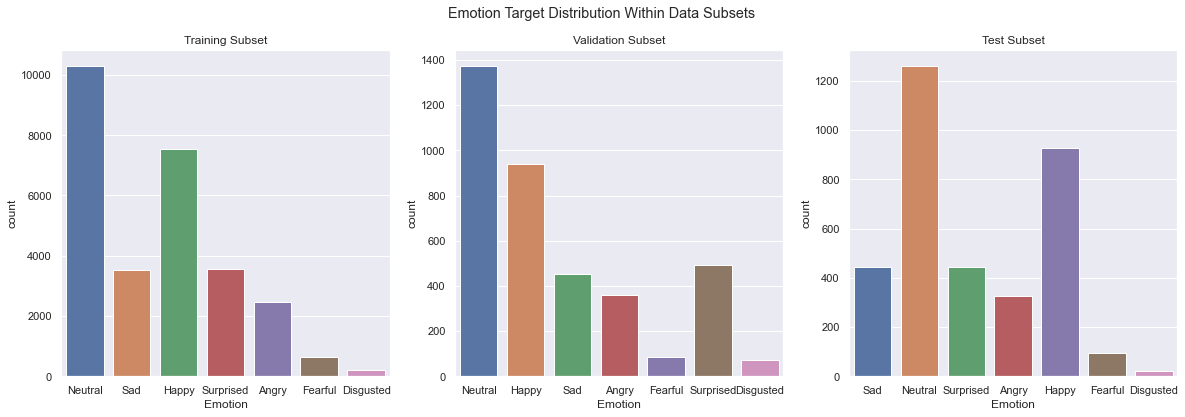

In [189]:
import seaborn as sns
sns.set_theme()

data = pd.read_csv("All_Data\All_Data_labels.csv")

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Emotion Target Distribution Within Data Subsets')

#sns.countplot(x="Emotion",data=data[data["Usage"]=="Test"])

sns.countplot(ax=axes[0], x="Emotion",data=data[data["Usage"]=="Training"])
axes[0].set_title("Training Subset")

sns.countplot(ax=axes[1], x="Emotion",data=data[data["Usage"]=="Validation"])
axes[1].set_title("Validation Subset")

sns.countplot(ax=axes[2], x="Emotion",data=data[data["Usage"]=="Test"])
axes[2].set_title("Test Subset")


In [ ]:
#HIGHLY UNBALANCED 
# IDEA : Reduce 
    # Training: 4000 per class
    # Val/Test: 500 per class 
# IDEA : Augment Minority classes 
# IDEA : Add more data from other datasets 
# IDEA : Remove Fearful, Disgusted